In [64]:
import pickle
import torch
import cv2
from torch.utils.data import Dataset, DataLoader
import numpy as np
#https://pytorch.org/hub/ultralytics_yolov5/

# with open("CUDatamap_line2.pkl","wb") as f:
#     pickle.dump(data_line_map,f) #Store the datamap for further processig
# with open("CUDatamap_coef.pkl","wb") as f:
#     pickle.dump(data_coef_map,f) #Store the datamap for further processig

with open("CUDatamap_line2.pkl","rb") as f:
    data_line_map = pickle.load(f)
with open("CUDatamap_stline2.pkl","rb") as f:
    data_stline_map = pickle.load(f)

with open("CUDatamap_coef.pkl","rb") as f:
    data_coef_map = pickle.load(f)



y_col = np.linspace(400,580,19)

class LaneDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, data_line_map, scale=None):
        
        self.new_data_keys = list(data_line_map.keys())
        self.data_line_map = data_line_map
        self.scale = scale
  

    def __len__(self):
        return len(self.new_data_keys)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        image_loc = self.new_data_keys[idx]
        lines = data_line_map[image_loc] #Since
        image = cv2.imread(image_loc)
        stlines = data_stline_map[image_loc]

        return (image,lines,stlines,idx)

In [26]:
#1 Divide the width of each image in 16 parts
#Then for median of each line find which of these 16 parts does the line belong too. 
#Assign that line to that sector, confidence 1, while put zero confidence for rest and prediction also zero.
#While computation of loss , all confidences are taken into account but line loss is only calculated for the ones with ones available.

In [27]:
lane_dataset = LaneDataset(data_line_map=data_line_map)

### Calculate line median spread accross width of image

In [17]:
## This is to decide the bins :)
line_medians = []
def get_medians(mylines):
    global line_medians
    for line in mylines:
        size = len(line)
        line_medians.append(line[size//2])

In [9]:
count = 0
for sample in lane_dataset:
    image,lines = sample
    get_medians(lines)
    if count%10==0:
        print(count/lane_dataset.__len__())
    count+=1
    if count>1000:
        break
    

0.0
0.0006169031462060457
0.0012338062924120913
0.001850709438618137
0.0024676125848241827
0.0030845157310302285
0.003701418877236274
0.00431832202344232
0.004935225169648365
0.005552128315854411
0.006169031462060457
0.006785934608266502
0.007402837754472548
0.008019740900678593
0.00863664404688464
0.009253547193090685
0.00987045033929673
0.010487353485502776
0.011104256631708822
0.011721159777914868
0.012338062924120914
0.012954966070326958
0.013571869216533004
0.01418877236273905
0.014805675508945095
0.015422578655151141
0.016039481801357187
0.016656384947563233
0.01727328809376928
0.017890191239975324
0.01850709438618137
0.019123997532387416
0.01974090067859346
0.020357803824799507
0.020974706971005553
0.0215916101172116
0.022208513263417645
0.02282541640962369
0.023442319555829736
0.024059222702035782
0.024676125848241828
0.025293028994447873
0.025909932140653916
0.02652683528685996
0.027143738433066007
0.027760641579272053
0.0283775447254781
0.028994447871684145
0.0296113510178901

In [12]:
line_medians = np.array(line_medians)
line_medians.min(),line_medians.max(),line_medians.mean(),line_medians.std(),image.shape

(-158.85714285714766,
 1849.7500000000036,
 742.385672623585,
 323.0308363645911,
 (590, 1640, 3))

In [28]:
count = 0
for sample in lane_dataset:
    image,lines,st_lines = sample
    colors = {0:(255,0,0),1:(0,255,0),2:(0,0,255),3:(255,255,255)}
    
    for j,l in enumerate(lines):
        my_line = l.astype(int)
        for i,p in enumerate(my_line):
            cv2.circle(image, (p, int(y_col[i])), i+1, colors[j], -1)

    for j,l in enumerate(st_lines):
        my_line = l.astype(int)
        for i,p in enew_st_linesnumerate(my_line):
            cv2.circle(image, (p, int(y_col[i])), i+1, (0,0,0), -1)

  
    
    cv2.imshow("Frame",image)
    k=cv2.waitKey(100)
    if(k==ord('q')):
        break

cv2.destroyAllWindows()
    

In [24]:
st_lines

{'driver_161_90frame/06030819_0755.MP4/00000.jpg': [array([718.50877193, 699.68947368, 680.87017544, 662.05087719,
         643.23157895, 624.4122807 , 605.59298246, 586.77368421,
         567.95438596, 549.13508772, 530.31578947, 511.49649123,
         492.67719298, 473.85789474, 455.03859649, 436.21929825,
         417.4       , 398.58070175, 379.76140351]),
  array([774., 774., 774., 774., 774., 774., 774., 774., 774., 774., 774.,
         774., 774., 774., 774., 774., 774., 774., 774.]),
  array([ 827.03508772,  845.16315789,  863.29122807,  881.41929825,
          899.54736842,  917.6754386 ,  935.80350877,  953.93157895,
          972.05964912,  990.1877193 , 1008.31578947, 1026.44385965,
         1044.57192982, 1062.7       , 1080.82807018, 1098.95614035,
         1117.08421053, 1135.2122807 , 1153.34035088]),
  array([ 959.01818182, 1022.36363636, 1085.70909091, 1149.05454545,
         1212.4       , 1275.74545455, 1339.09090909, 1402.43636364,
         1465.78181818, 1529.1272

In [ ]:
#The following things wont since we are getting points outside image even outside the image
    #1 Divide the width of each image in 16 parts
    #Then for median of each line find which of these 16 parts does the line belong too. 
    #Assign that line to that sector, confidence 1, while put zero confidence for rest and prediction also zero.
    #While computation of loss , all confidences are taken into account but line loss is only calculated for the ones with ones available.

In [ ]:
#The following algorithm is designed for proper dataset formation.
#Get the lines. Decide among them which is left most. Keep doing for all lanes.
#Sort the lines in just 4 bins thats it ! . LL L R RR
#There for now use list appending. 
# Pop the lowest, append the lowest, repeat until zero. You can use the last value or the value if if you wish.


In [ ]:
## OR cool idea. Use the lane intercept method. 
##the boundary of the image is divided into 14 borders.
##Even better. Use Angle from centre of image method. The direction of the median could be a good bin? or even the last 
## Lets analyze it. 
## So lets divide the circle into. But that said lets also go back and fit a line on the lane even though its curved. It would be better to do that.
#Ok now we have the lines. Lets role. 
#Now the idea is that we need to put these lines in bins that network can understand. So we will put based on the direction the lane lines are located.
#The centre is chose as centre of width. height is twice the image heighe from bottom. 
'''
                                                         **Centre**


                    **Line1

    
                    
    ** Line2


                                            **Line3                                           **Line4


                                            
'''
#We chose the last position for the line point. And we compute the angle.
#Now to compute the angles and since its an image, we are dealing with an invered version.
#We need to find co-ordinates with respect to centre
#Therefore the point - centre = (col - width//2, row - - height)
#So angle is now atan2(newrow/newcol)

In [54]:
height,width,channel = image.shape
print(height,width,channel)

def get_lane_angle(myline):
    global y_col #its actually row
    row = y_col[-1]
    col = myline[-1]
    
    new_col = col - width//2
    new_row = row + height

    angle = -np.arctan2(new_col,new_row)
    # if angle<0:
    #     angle = 2*np.pi+angle
    
    return angle


#Ok lets analyze our lanes whether we are correct or now

590 1640 3


In [43]:
count = 0
angles = []
for sample in lane_dataset:
    image,lines,st_lines = sample
    for line in st_lines:
        angles.append(get_lane_angle(line))
    if count%10==0:
        print(count/lane_dataset.__len__())
    count+=1
    if count>1000:
        break
    

0.0
0.0006169031462060457
0.0012338062924120913
0.001850709438618137
0.0024676125848241827
0.0030845157310302285
0.003701418877236274
0.00431832202344232
0.004935225169648365
0.005552128315854411
0.006169031462060457
0.006785934608266502
0.007402837754472548
0.008019740900678593
0.00863664404688464
0.009253547193090685
0.00987045033929673
0.010487353485502776
0.011104256631708822
0.011721159777914868
0.012338062924120914
0.012954966070326958
0.013571869216533004
0.01418877236273905
0.014805675508945095
0.015422578655151141
0.016039481801357187
0.016656384947563233
0.01727328809376928
0.017890191239975324
0.01850709438618137
0.019123997532387416
0.01974090067859346
0.020357803824799507
0.020974706971005553
0.0215916101172116
0.022208513263417645
0.02282541640962369
0.023442319555829736
0.024059222702035782
0.024676125848241828
0.025293028994447873
0.025909932140653916
0.02652683528685996
0.027143738433066007
0.027760641579272053
0.0283775447254781
0.028994447871684145
0.0296113510178901

In [44]:
angles = np.array(angles)
import matplotlib.pyplot as plt

(array([  2.,   1.,   0.,   1.,   0.,   2.,   1.,   0.,   0.,   1.,   4.,
          2.,   1.,   4.,   4.,   8.,  22.,  35.,  51.,  68.,  66.,  81.,
         84.,  33.,  37.,  38.,  26.,  35.,  22.,  21.,  44.,  28.,  22.,
         59.,  81.,  89., 137., 113.,  75.,  89.,  27.,  26.,  50.,  10.,
          6.,   7.,  19.,  14.,  34.,  42.,  25.,  28.,  23.,  24.,  36.,
         59., 107., 176., 203., 114.,  43.,  13.,  25.,  16.,  11.,  11.,
         20.,   9.,  41.,  21.,  29.,  39.,  55., 160., 122., 118.,  89.,
         35.,  34.,  33.,  10.,  11.,  20.,   2.,   5.,   2.,   3.,   1.,
          3.,   2.]),
 array([-1.05926397, -1.03656174, -1.0138595 , -0.99115727, -0.96845503,
        -0.9457528 , -0.92305056, -0.90034833, -0.87764609, -0.85494386,
        -0.83224162, -0.80953938, -0.78683715, -0.76413491, -0.74143268,
        -0.71873044, -0.69602821, -0.67332597, -0.65062374, -0.6279215 ,
        -0.60521927, -0.58251703, -0.5598148 , -0.53711256, -0.51441033,
        -0.49170809, 

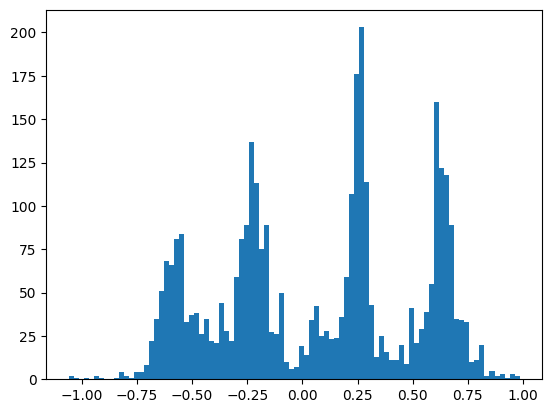

In [53]:
plt.hist(angles,bins=90)

In [46]:
#The above is a good spread. 
#We can now put the lines into bins. Looking at the histogram. The lanes can be divided into 9 bins
# -1, -0.75, -0.5, -0.25, 0, 0.25. 0.5, 0.75. 1
#If you divide this numbers by 0.25 then you get -4, -3, -2, -1, 0, 1, 2, 3, 4. And then you add 4
# So you get 0, 1, 2, 3 , 4, 5, 6, 7, 8.   So the equation to turn angle into a bin is int(abs(angle/0.25)) + 4
#Lets try this and plot the histogram

In [86]:
def get_lane_bins(line):
    angle = get_lane_angle(line)
    angle = np.clip(angle,-1,1) 
    mybin = int(round(angle/0.25))+4
    return mybin,angle

count = 0
bins = []
angles = []
for sample in lane_dataset:
    image,lines,st_lines,idx = sample
    for line in st_lines:
        mybin,angle = get_lane_bins(line)
        bins.append(mybin)
        angles.append(angle)
    if count%10==0:
        print(count/lane_dataset.__len__())
    count+=1
    if count>1000:
        break
    

0.0
0.0006169031462060457
0.0012338062924120913
0.001850709438618137
0.0024676125848241827
0.0030845157310302285
0.003701418877236274
0.00431832202344232
0.004935225169648365
0.005552128315854411
0.006169031462060457
0.006785934608266502
0.007402837754472548
0.008019740900678593
0.00863664404688464
0.009253547193090685
0.00987045033929673
0.010487353485502776
0.011104256631708822
0.011721159777914868
0.012338062924120914
0.012954966070326958
0.013571869216533004
0.01418877236273905
0.014805675508945095
0.015422578655151141
0.016039481801357187
0.016656384947563233
0.01727328809376928
0.017890191239975324
0.01850709438618137
0.019123997532387416
0.01974090067859346
0.020357803824799507
0.020974706971005553
0.0215916101172116
0.022208513263417645
0.02282541640962369
0.023442319555829736
0.024059222702035782
0.024676125848241828
0.025293028994447873
0.025909932140653916
0.02652683528685996
0.027143738433066007
0.027760641579272053
0.0283775447254781
0.028994447871684145
0.0296113510178901

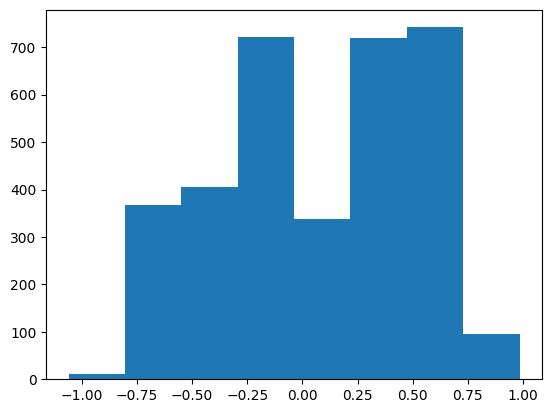

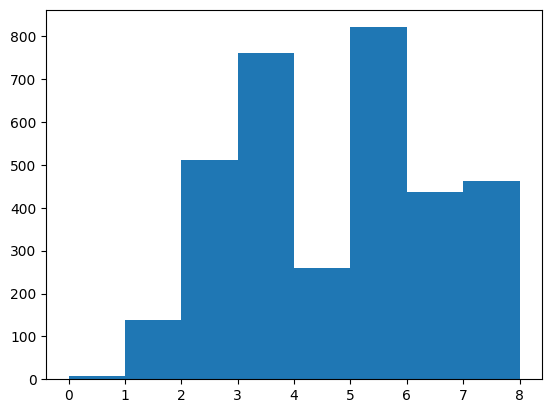

In [62]:
plt.hist(angles,bins=8)
plt.show()
plt.hist(bins,bins=8)
plt.show()

In [72]:
#The above histogram is similar but not same. Lets use np.digitize. For this to work we need to run through whole dataset
lane_dataset = LaneDataset(data_line_map=data_line_map) #relaunch to rest the ids

count = 0
angles = []plt.hist(angles,bins=8)
plt.show()
plt.hist(bins,bins=8)
plt.show()
my_ids = [] #just incase the generator is rando:)
for sample in lane_dataset:
    image,lines,st_lines,idx = sample
    for line in st_lines:
        angles.append(get_lane_angle(line))
    my_ids.append(idx)
    if count%100==0:
        print(count/lane_dataset.__len__())
    count+=1def get_lane_bins(line):
    angle = get_lane_angle(line)
    angle = np.clip(angle,-1,1) 
    mybin = int(round(angle/0.25))+4
    return mybin,angle

count = 0
bins = []
angles = []
for sample in lane_dataset:
    image,lines,st_lines,idx = sample
    for line in st_lines:
        mybin,angle = get_lane_bins(line)
        bins.append(mybin)
        angles.append(angle)
    if count%10==0:
        print(count/lane_dataset.__len__())
    count+=1
    if count>1000:
        break
    
   
    

0.0
0.006169031462060457
0.012338062924120914
0.01850709438618137
0.024676125848241828
0.030845157310302282
0.03701418877236274
0.0431832202344232
0.049352251696483655
0.055521283158544106
0.061690314620604564
0.06785934608266501
0.07402837754472548
0.08019740900678593
0.0863664404688464
0.09253547193090685
0.09870450339296731
0.10487353485502776
0.11104256631708821
0.11721159777914868
0.12338062924120913
0.1295496607032696
0.13571869216533003
0.1418877236273905
0.14805675508945096
0.15422578655151142
0.16039481801357186
0.16656384947563233
0.1727328809376928
0.17890191239975323
0.1850709438618137
0.19123997532387416
0.19740900678593462
0.20357803824799506
0.20974706971005552
0.215916101172116
0.22208513263417642
0.2282541640962369
0.23442319555829735
0.2405922270203578
0.24676125848241826
0.2529302899444787
0.2590993214065392
0.2652683528685996
0.27143738433066006
0.27760641579272055
0.283775447254781
0.2899444787168415
0.2961135101789019
0.30228254164096235
0.30845157310302285
0.3146

In [73]:
angles_2 = np.array(angles)
ids = np.array(my_ids)

In [74]:
# np.save('angles.npy',angles_2)
# np.save('idx.npy',ids)

# #The ids seems arranged

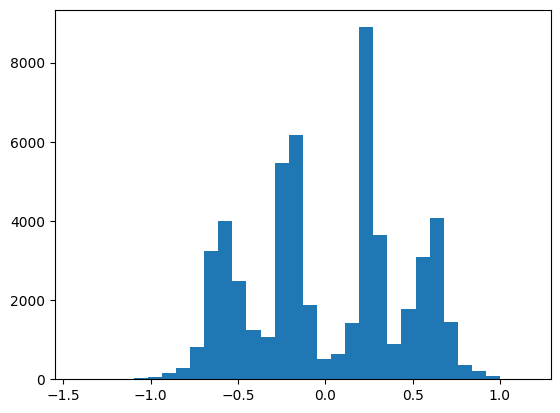

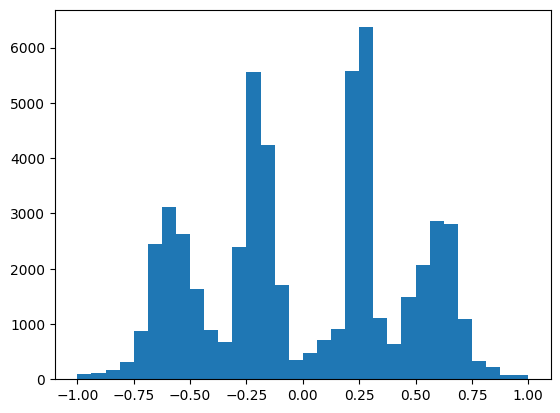

In [79]:
plt.hist(angles_2,bins=32)
plt.show()
#As there are outliers we can clip the angles
angles_clipped = np.clip(angles_2,-1,1)
plt.hist(angles_clipped,bins=32)
plt.show()

In [83]:
#Next we use the digitize function
possible_bins= np.array([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
my_angle_bins = np.digitize(angles_clipped,possible_bins)

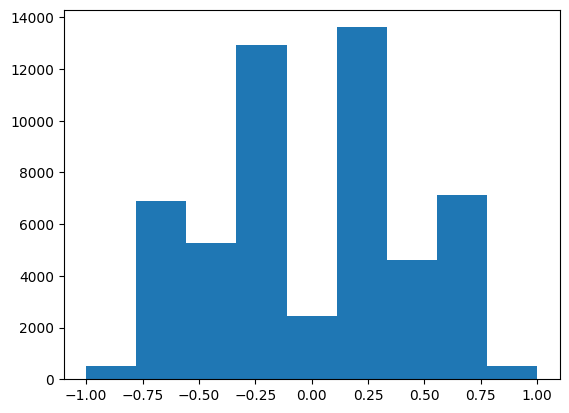

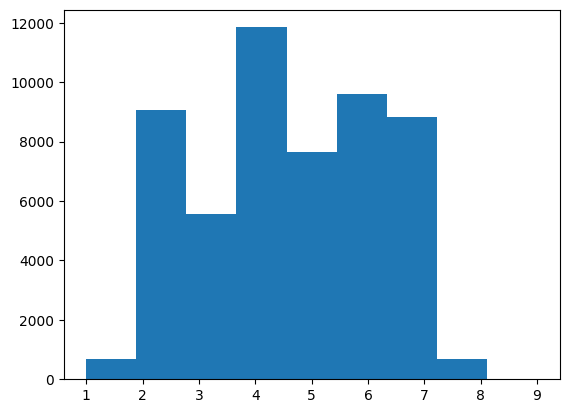

In [90]:
angles_clipped = np.clip(angles_2,-1,1)
plt.hist(angles_clipped,bins=9)
plt.show()
plt.hist(my_angle_bins,bins=9)
plt.show()

In [82]:
#As you can see the the histograms are matching and so we have successfully converted the angles into bins and thus the lanes to.

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
count = 0
bins = []
angles = []
for sample in lane_dataset:
    image,lines,st_lines,idx = sample
    for line in st_lines:
        mybin,angle = get_lane_bins(line)
        bins.append(mybin)
        angles.append(angle)
    if count%10==0:
        print(count/lane_dataset.__len__())
    count+=1
    if count>1000:
        break
    

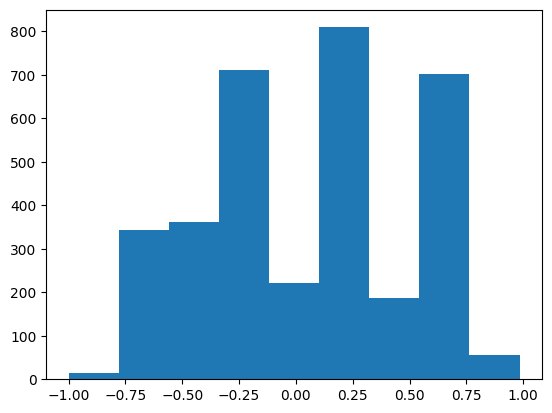

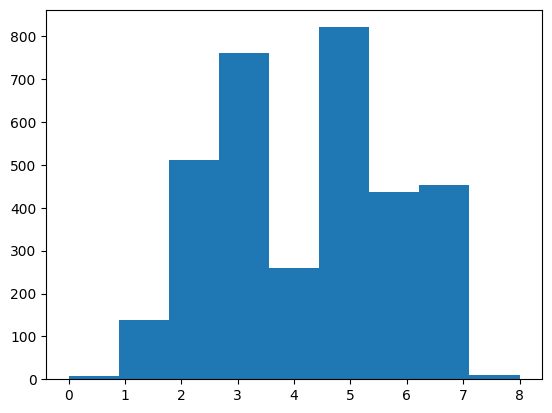

In [91]:
plt.hist(angles,bins=9)
plt.show()
plt.hist(bins,bins=9)
plt.show()

In [92]:
#This a trial for 18bins. So now you divide by 0.125 and add 8
def get_lane_bins(line):
    angle = get_lane_angle(line)
    angle = np.clip(angle,-1,1) 
    mybin = int(round(angle/0.125))+8
    return mybin,angle

count = 0
bins = []
angles = []
for sample in lane_dataset:
    image,lines,st_lines,idx = sample
    for line in st_lines:
        mybin,angle = get_lane_bins(line)
        bins.append(mybin)
        angles.append(angle)
    if count%10==0:
        print(count/lane_dataset.__len__())
    count+=1
    if count>1000:
        break
    

0.0
0.0006169031462060457
0.0012338062924120913
0.001850709438618137
0.0024676125848241827
0.0030845157310302285
0.003701418877236274
0.00431832202344232
0.004935225169648365
0.005552128315854411
0.006169031462060457
0.006785934608266502
0.007402837754472548
0.008019740900678593
0.00863664404688464
0.009253547193090685
0.00987045033929673
0.010487353485502776
0.011104256631708822
0.011721159777914868
0.012338062924120914
0.012954966070326958
0.013571869216533004
0.01418877236273905
0.014805675508945095
0.015422578655151141
0.016039481801357187
0.016656384947563233
0.01727328809376928
0.017890191239975324
0.01850709438618137
0.019123997532387416
0.01974090067859346
0.020357803824799507
0.020974706971005553
0.0215916101172116
0.022208513263417645
0.02282541640962369
0.023442319555829736
0.024059222702035782
0.024676125848241828
0.025293028994447873
0.025909932140653916
0.02652683528685996
0.027143738433066007
0.027760641579272053
0.0283775447254781
0.028994447871684145
0.0296113510178901

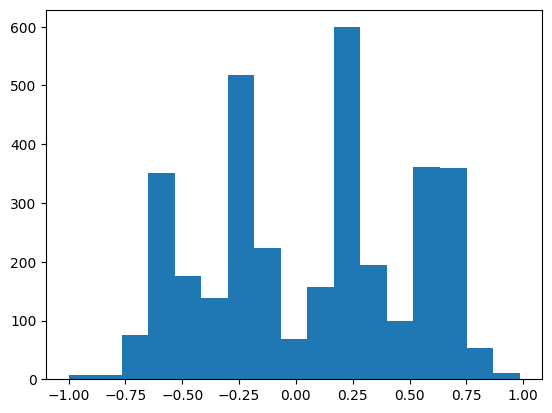

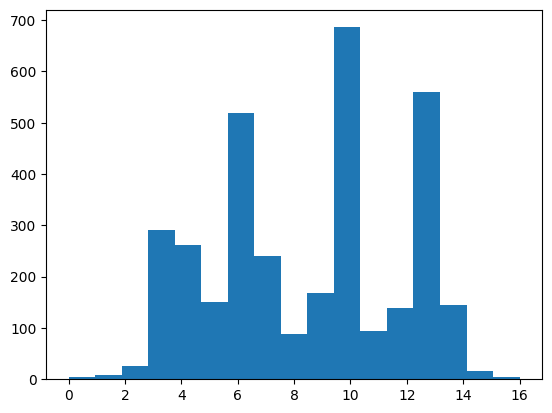

In [93]:
plt.hist(angles,bins=17)
plt.show()
plt.hist(bins,bins=17)
plt.show()

In [94]:
#After checkproperly, the function works and there is not need to use the np.digitixze function.

In [95]:
#Now there are 19 line outputs and there are 17 bins, So Each bin has 17 outputs. Total network is 323 output

(19,)